In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# loading csv file to pandas df
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# describing data statiscally
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# Correlation
correlation = gold_data.corr()

<AxesSubplot:>

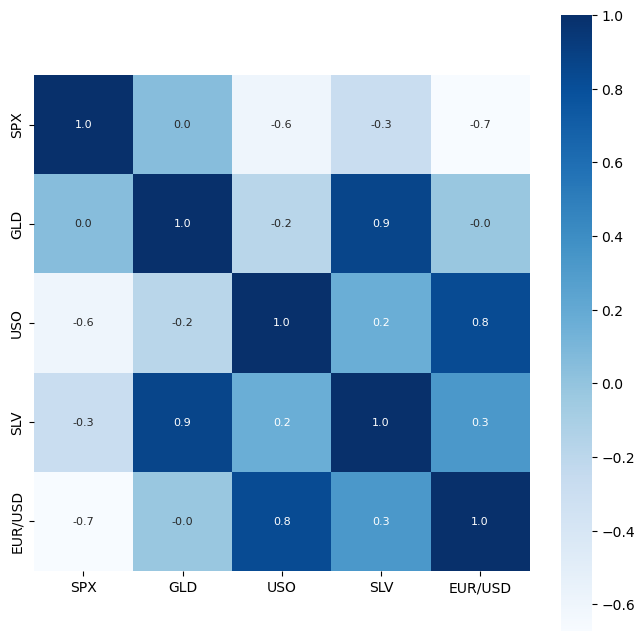

In [13]:
# HeatMap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# GLD - Target Variable
print(correlation['GLD']) 

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\awast\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

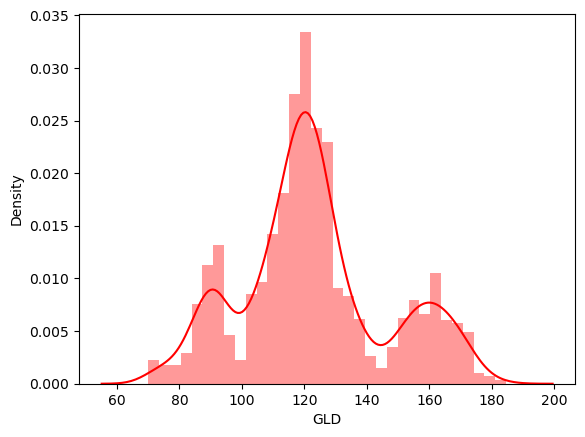

In [15]:
# Distribution of gold price
sns.distplot(gold_data['GLD'],color='red')

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1) # Feature set X
Y = gold_data['GLD']                      # Target set Y

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# Spilitting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [23]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(1832, 4) (458, 4)
(1832,) (458,)


In [39]:
# Intialize the models
regressor_rf = RandomForestRegressor(n_estimators=100)
regressor_lr = LinearRegression()
regressor_dt = DecisionTreeRegressor(random_state=2)

In [40]:
# Training the models
regressor_rf.fit(X_train, Y_train)
regressor_lr.fit(X_train, Y_train)
regressor_dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=2)

In [43]:
# Making predictions on the test data for each model
test_data_prediction_rf = regressor_rf.predict(X_test)
test_data_prediction_lr = regressor_lr.predict(X_test)
test_data_prediction_dt = regressor_dt.predict(X_test)

In [44]:
# R-squared error for each model
error_score_rf = metrics.r2_score(Y_test, test_data_prediction_rf)
error_score_lr = metrics.r2_score(Y_test, test_data_prediction_lr)
error_score_dt = metrics.r2_score(Y_test, test_data_prediction_dt)

In [45]:
print("Random Forest R squared error: ", error_score_rf)
print("Linear Regression R squared error: ", error_score_lr)
print("Decision Tree R squared error: ", error_score_dt)

Random Forest R squared error:  0.9902547578397211
Linear Regression R squared error:  0.8657886565869237
Decision Tree R squared error:  0.9841921544997235


In [48]:
# Function to calculate prediction error
def percentage_error(actual, predicted):
    return np.abs((actual - predicted) / actual) * 100

In [49]:
# Function to calculate accuracy based on threshold for % error
def accuracy(percentage_error, threshold=10):
    return np.mean(percentage_error < threshold) * 100

In [51]:
percentage_error_rf = percentage_error(Y_test, test_data_prediction_rf)
percentage_error_lr = percentage_error(Y_test, test_data_prediction_lr)
percentage_error_dt = percentage_error(Y_test, test_data_prediction_dt)

In [52]:
accuracy_rf = accuracy(percentage_error_rf)
accuracy_lr = accuracy(percentage_error_lr)
accuracy_dt = accuracy(percentage_error_dt)

In [53]:
print("Accuracy for Random Forest: {:.2f}%".format(accuracy_rf))
print("Accuracy for Linear Regression: {:.2f}%".format(accuracy_lr))
print("Accuracy for Decision Tree: {:.2f}%".format(accuracy_dt))

Accuracy for Random Forest: 99.56%
Accuracy for Linear Regression: 95.63%
Accuracy for Decision Tree: 99.34%


In [54]:
Y_test_list = list(Y_test)

plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

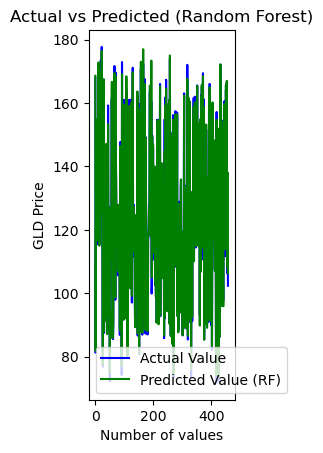

In [55]:
# Plot for Random Forest
plt.subplot(1, 3, 1)
plt.plot(Y_test_list, color='blue', label='Actual Value')
plt.plot(test_data_prediction_rf, color='green', label='Predicted Value (RF)')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()

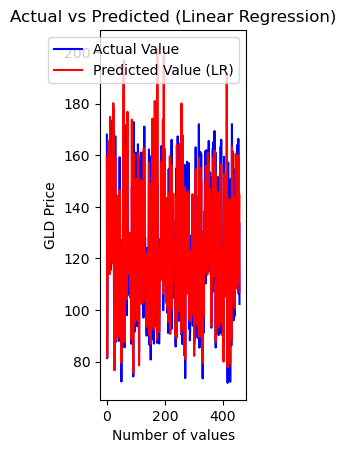

In [57]:
# Plot for Linear Regression
plt.subplot(1, 3, 2)
plt.plot(Y_test_list, color='blue', label='Actual Value')
plt.plot(test_data_prediction_lr, color='red', label='Predicted Value (LR)')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()

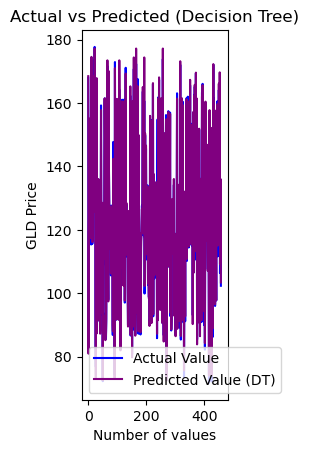

In [58]:
# Plot for Decision Tree
plt.subplot(1, 3, 3)
plt.plot(Y_test_list, color='blue', label='Actual Value')
plt.plot(test_data_prediction_dt, color='purple', label='Predicted Value (DT)')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()